# MATPLOTLIB

* Grazficki prikaz podataka
* Instalacija najbolje preko anaconde (dolazi kao default)
* <a href='https://matplotlib.org/2.0.2/users/installing.html'> LINK </a> za one koji bi svejedno to htijeli preko pip-a
* <a href='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'> DATASET </a> za ovo preadavnje se moze naci i na predhodnom linku

#### IMPORTS

In [1]:
import matplotlib.pyplot as plt # plt od plot unajcesca kratica za matplot
import pandas as pd
%matplotlib inline

**NOTE**: %matplotlib inline -> magic comand koja nam omogucava prikaz grafova kao dio notebook-a i da ne moram pisati plt.show() za svaki graf

### UCITAVANJE I PREPREMA PODATAKA

In [2]:
data_raw = pd.read_csv('covid_data.csv')
data_raw

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      14/12/2020   14     12  2020    746       6             Afghanistan   
1      13/12/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      11/12/2020   11     12  2020     63      10             Afghanistan   
4      10/12/2020   10     12  2020    202      16             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61895  25/03/2020   25      3  2020      0       0                Zimbabwe   
61896  24/03/2020   24      3  2020      0       1                Zimbabwe   
61897  23/03/2020   23      3  2020      0       0                Zimbabwe   
61898  22/03/2020   22      3  2020      1       0                Zimbabwe   
61899  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
0        AF                  AFG   38041757.0         Asia   
1        AF                  AFG   38041757.0         Asia   
2        AF                  AFG   38041757.0         Asia   
3        AF                  AFG   38041757.0         Asia   
4        AF                  AFG   38041757.0         Asia   
...     ...                  ...          ...          ...   
61895    ZW                  ZWE   14645473.0       Africa   
61896    ZW                  ZWE   14645473.0       Africa   
61897    ZW                  ZWE   14645473.0       Africa   
61898    ZW                  ZWE   14645473.0       Africa   
61899    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                               9.013779           
1                                               7.052776           
2                                               6.868768           
3                                               7.134266           
4                                               6.968658           
...                                                  ...           
61895                                                NaN           
61896                                                NaN           
61897                                                NaN           
61898                                                NaN           
61899                                                NaN           

[61900 rows x 12 columns]

In [3]:
data_raw.dtypes

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

In [4]:
data_raw.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [5]:
data_raw.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [6]:
data = data_raw[['dateRep', 'cases', 'deaths', 'popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

In [7]:
data

dateRep  cases  deaths  popData2019  \
0      14/12/2020    746       6   38041757.0   
1      13/12/2020    298       9   38041757.0   
2      12/12/2020    113      11   38041757.0   
3      11/12/2020     63      10   38041757.0   
4      10/12/2020    202      16   38041757.0   
...           ...    ...     ...          ...   
61895  25/03/2020      0       0   14645473.0   
61896  24/03/2020      0       1   14645473.0   
61897  23/03/2020      0       0   14645473.0   
61898  22/03/2020      1       0   14645473.0   
61899  21/03/2020      1       0   14645473.0   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                               9.013779           
1                                               7.052776           
2                                               6.868768           
3                                               7.134266           
4                                               6.968658           
...                                                  ...           
61895                                                NaN           
61896                                                NaN           
61897                                                NaN           
61898                                                NaN           
61899                                                NaN           

[61900 rows x 5 columns]

In [8]:
data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(0, inplace=True)
data.rename(
    columns={
        "dateRep": 'date',
        'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': "cumulative_cases_2week"
        
    }, 
    inplace=True
)

/tmp/ipykernel_253743/3999582738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(0, inplace=True)
/tmp/ipykernel_253743/3999582738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(


In [9]:
data

date  cases  deaths  popData2019  cumulative_cases_2week
0      14/12/2020    746       6   38041757.0                9.013779
1      13/12/2020    298       9   38041757.0                7.052776
2      12/12/2020    113      11   38041757.0                6.868768
3      11/12/2020     63      10   38041757.0                7.134266
4      10/12/2020    202      16   38041757.0                6.968658
...           ...    ...     ...          ...                     ...
61895  25/03/2020      0       0   14645473.0                0.000000
61896  24/03/2020      0       1   14645473.0                0.000000
61897  23/03/2020      0       0   14645473.0                0.000000
61898  22/03/2020      1       0   14645473.0                0.000000
61899  21/03/2020      1       0   14645473.0                0.000000

[61900 rows x 5 columns]

In [10]:
data['date'] = pd.to_datetime(data['date'])

/tmp/ipykernel_253743/736794659.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])
/tmp/ipykernel_253743/736794659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [11]:
data

date  cases  deaths  popData2019  cumulative_cases_2week
0     2020-12-14    746       6   38041757.0                9.013779
1     2020-12-13    298       9   38041757.0                7.052776
2     2020-12-12    113      11   38041757.0                6.868768
3     2020-12-11     63      10   38041757.0                7.134266
4     2020-12-10    202      16   38041757.0                6.968658
...          ...    ...     ...          ...                     ...
61895 2020-03-25      0       0   14645473.0                0.000000
61896 2020-03-24      0       1   14645473.0                0.000000
61897 2020-03-23      0       0   14645473.0                0.000000
61898 2020-03-22      1       0   14645473.0                0.000000
61899 2020-03-21      1       0   14645473.0                0.000000

[61900 rows x 5 columns]

In [12]:
print(data.isna().sum())
print(data.columns)
print(data.dtypes)

date                        0
cases                       0
deaths                      0
popData2019               123
cumulative_cases_2week      0
dtype: int64
Index(['date', 'cases', 'deaths', 'popData2019', 'cumulative_cases_2week'], dtype='object')
date                      datetime64[ns]
cases                              int64
deaths                             int64
popData2019                      float64
cumulative_cases_2week           float64
dtype: object


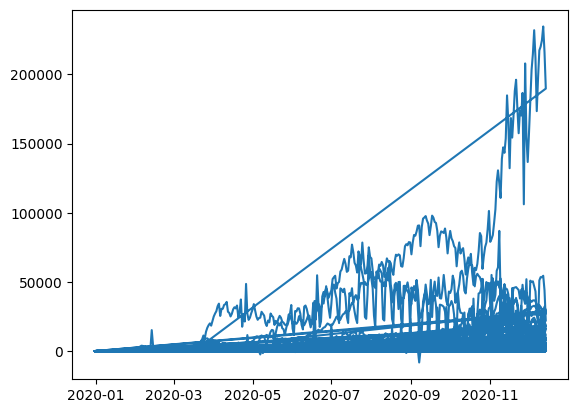

In [13]:
plt.plot(data.date, data.cases)
plt.show()

**NOTE**: plt.show() smo napisali tu kao podsjetnik za druge editore ali u notebook-u nam ne treba pa ga ubuduce necemo ni pisati

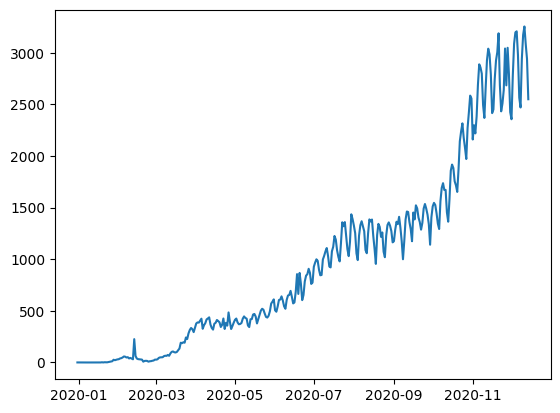

In [14]:
data_group = data.groupby('date', as_index=False).mean()
# data_group = data[['date, cases']].groupby('date', as_index=False).mean()
plt.plot(data_group.date, data_group.cases)

**NOTE**: plt.plot() prima min 2 argumenta 1 su podatci koje ce priakziat na x-os, a drugi su podatci koje ce prikazat na y-os

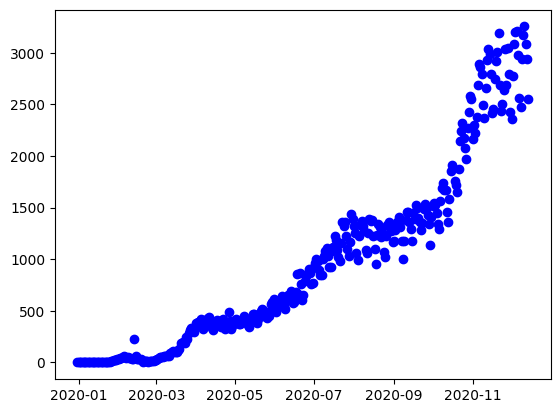

In [15]:
plt.plot(data_group.date, data_group.cases, 'ob')

**NOTE**: ob je kratica za: o -> prikaz kruzica (o-ova), b -> prikaz u plavoj boji (blue)

#### MOGUCNOSTI KRATICA:
* nista -> prikazuje liniju
* x -> prikazuje krizice
* o -> prikazuje kruzice
* b -> prkazuje pavom bojom
* k -> prikazuje crnom bojom
* g -> prikazuje zelenom bojm
* r -> crvenu
* za stil nijie jos postoje i: "-", "--", "-.", ":", "."

### POSTAVKE GRAFA

In [16]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 120
# plt.rcdefaults() # za vracanje da defaultne vrijednosti

**NOTE**:
* 'figure.figsize' -> postavlja omijer x i y osi
* 'figure.dpi' -> dots per inch postavlja koliko tocaka zelimo po inchu (utjece na velicinu)

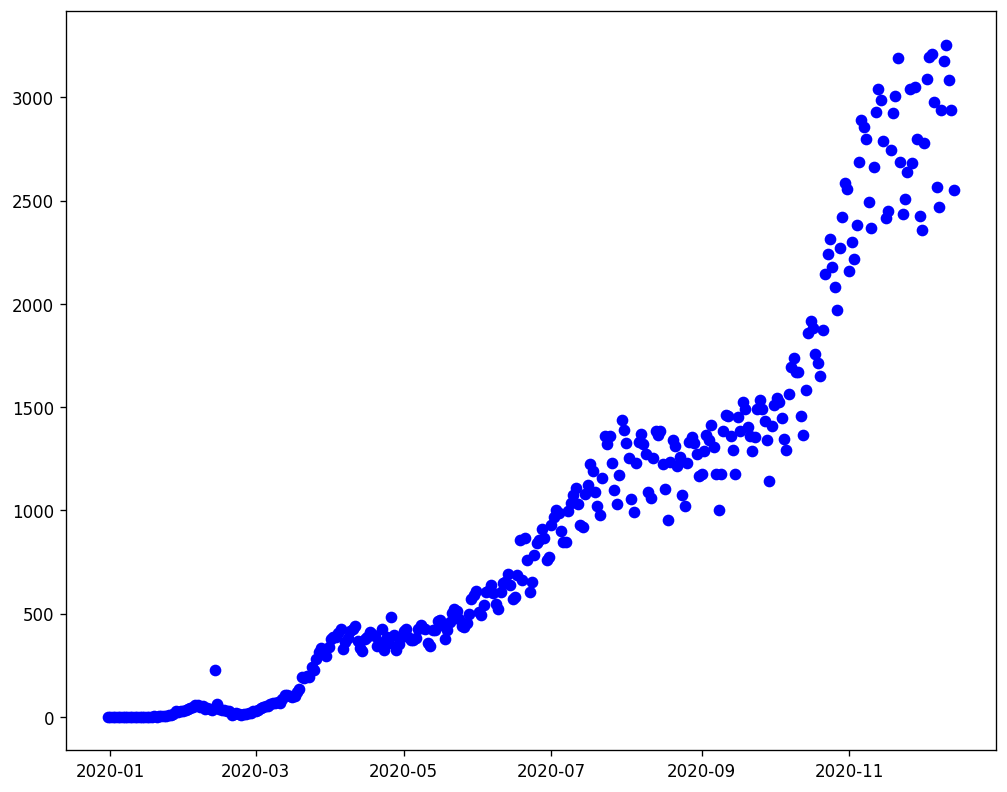

In [17]:
plt.plot(data_group.date, data_group.cases, 'ob')

In [18]:
okvir = plt.figure()

<Figure size 1200x960 with 0 Axes>

**NOTE**: "<Figure size 1200x960 with 0 Axes>" nam oznacava da imamo plot odnosgno figuru bez grafova (podataka u sebi)

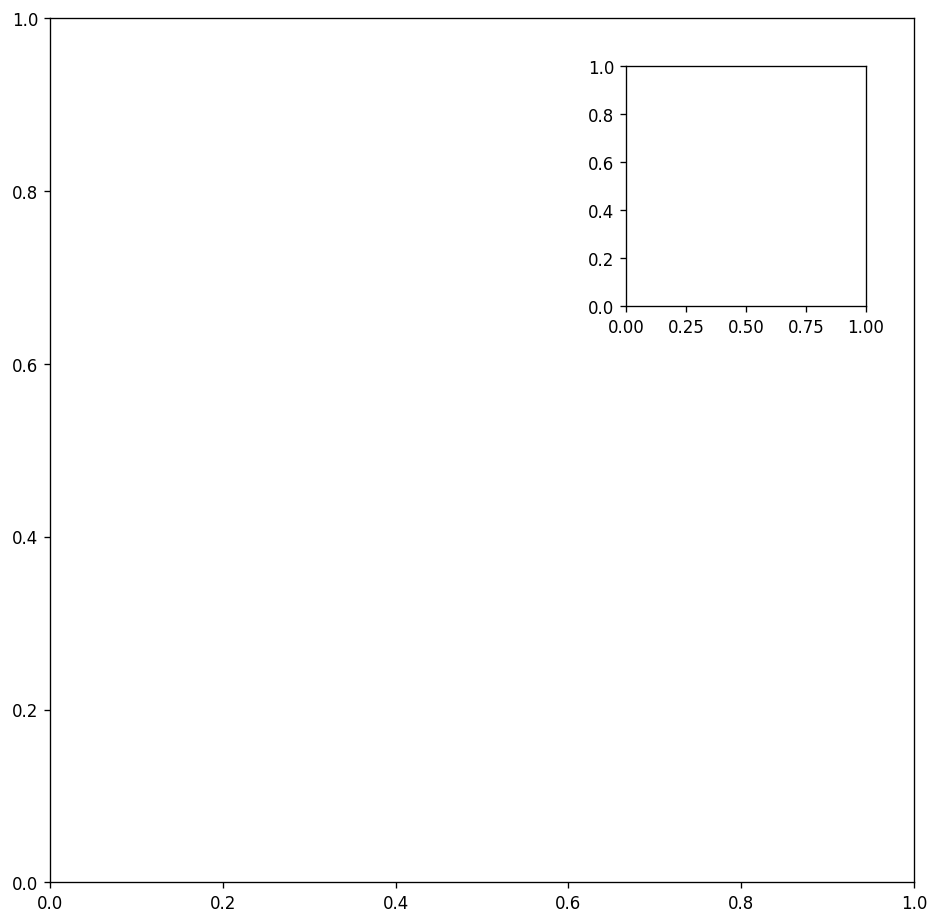

In [19]:
okvir =  plt.figure(figsize=(8,8))
vanjski = okvir.add_axes([0.1,0.1, 0.9, 0.9])
unutarnji = okvir.add_axes([0.7, 0.7, 0.25, 0.25])

**NOTE**: add_axis dodajemo koordinatni sutav unutar plota i posvaljmo mu koordinate kuteva (gornji lijevi i doljni desni)

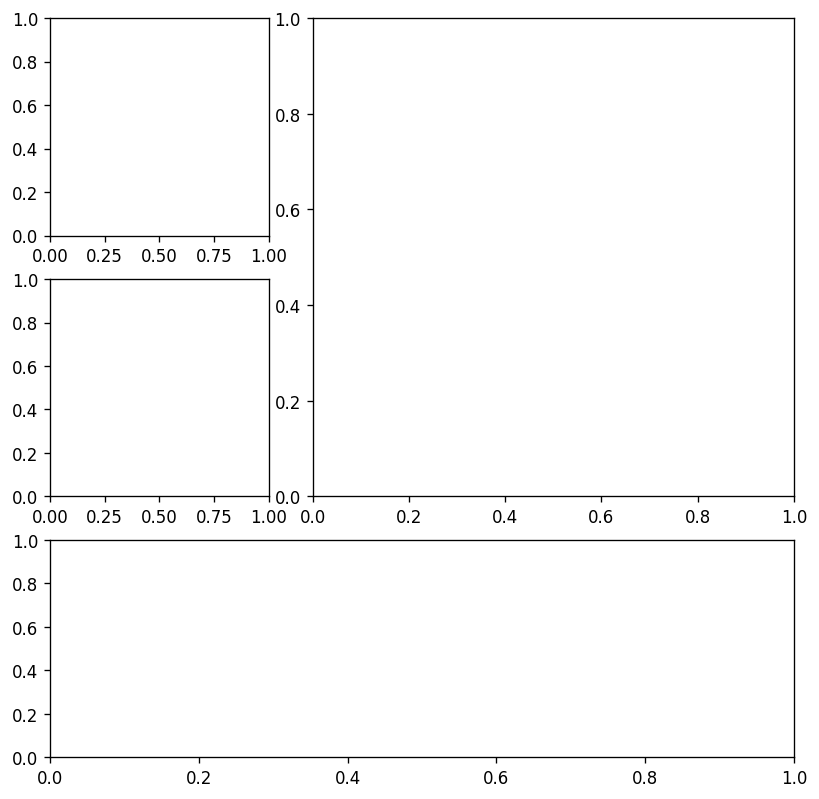

In [20]:
okvir = plt.figure(figsize=(8,8))
gs =  okvir.add_gridspec(3, 3) # napravimo mrezu koja je 3 stupca i 3 redka
gore_lijevo = okvir.add_subplot(gs[0,0]) # subpolt savimo u  priv red i prvi sutpac
gore_desno = okvir.add_subplot(gs[0:2, 1:]) # od pocetka do drugog stupca i od prvog do kraja reda
sredina_lijevo = okvir.add_subplot(gs[1,0])
dno = okvir.add_subplot(gs[2, :])

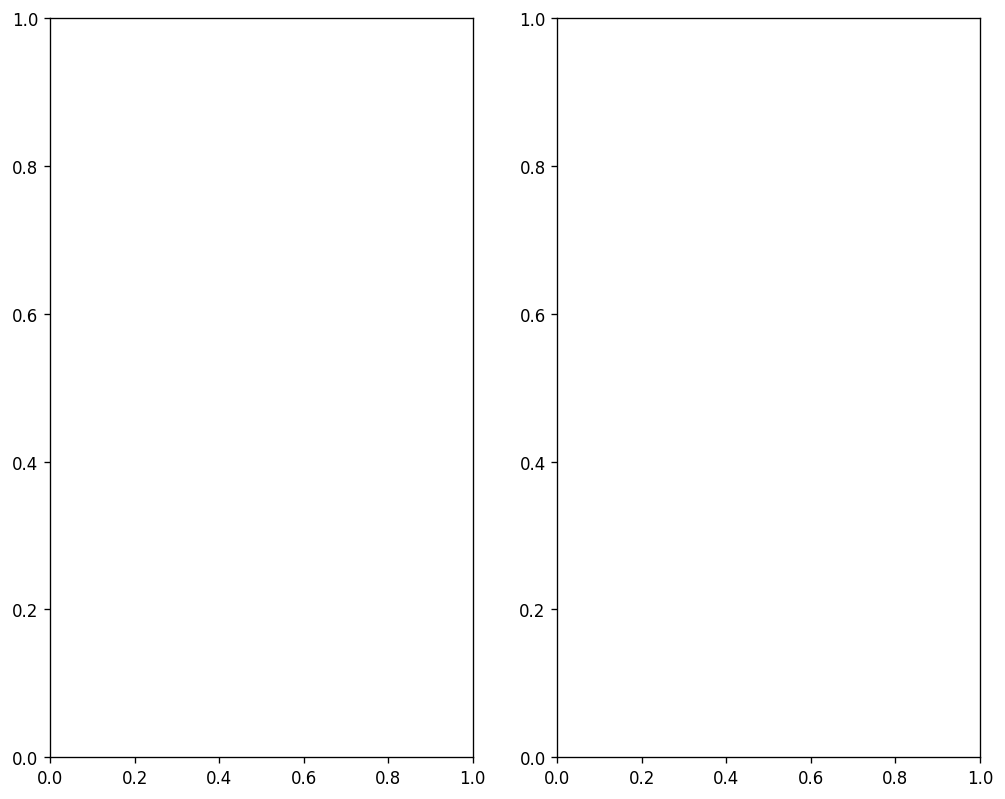

In [21]:
okvi, osi = plt.subplots(1, 2) # napravi subplotovoe podljene u 1 red i 2 supca

## VIZUALIZACIJA UNUTAR PANDASA

* pandas unutar sebe koristi numPy
* ali koristi i matplot
* detalji na <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html'>LINKU </a>

In [22]:
data.plot()

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x7f969528ed40> (for post_execute):


ValueError: Date ordinal -71697858.65 converts to -194333-12-06T08:23:59.998976 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -71697858.65 converts to -194333-12-06T08:23:59.998976 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1200x960 with 1 Axes>

**NOTE**: ako samo probamo napravit plot dobit cemo error jer pandas ne zna procitati nase datume pa moramo napravit konverziju date2num koja dolazi iz matplotlib.dates

/tmp/ipykernel_253743/2406791905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = mdates.date2num(data['date'])


<Axes: >

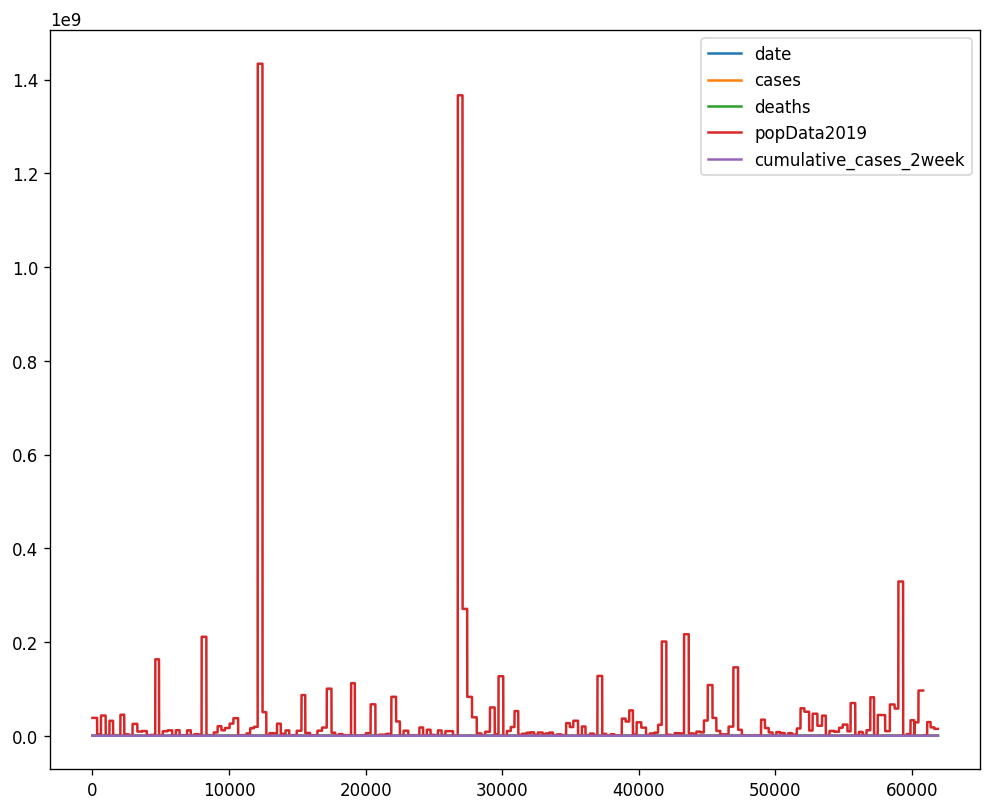

In [23]:
import matplotlib.dates as mdates
data['date'] = mdates.date2num(data['date'])
data.plot()

### NAJCESCI ARGUMENTI ZA PANDAS VIZUALIZAJU 
* kind -> tip grafa
* x i y -> za podatke koji idu na x i y os (1 ili lista njih) (columns)
* subplots -> true/false dal da ih korsiti
* title -> naziv grafa
* grid -> true/false da  li da iscrta grid
* color -> boja ili lista istih za prikaz 

<Axes: title={'center': 'Broj aktivnih covid slucajeva'}, xlabel='date'>

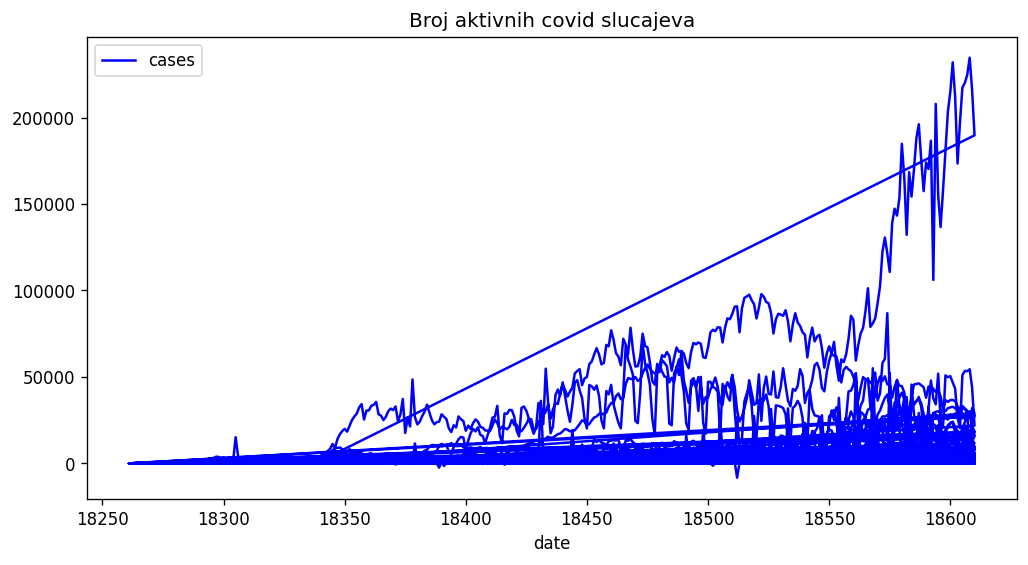

In [24]:
data.plot(
    kind = 'line',
    x = 'date',
    y= 'cases',
    figsize=(10,5),
    #style = '-b', ## postavit stil kao i prije
    color = 'blue',
    linestyle = 'solid', 
    legend = True,
    title = 'Broj aktivnih covid slucajeva'
)

<Axes: title={'center': 'Broj aktivnih covid slucajeva'}, xlabel='date'>

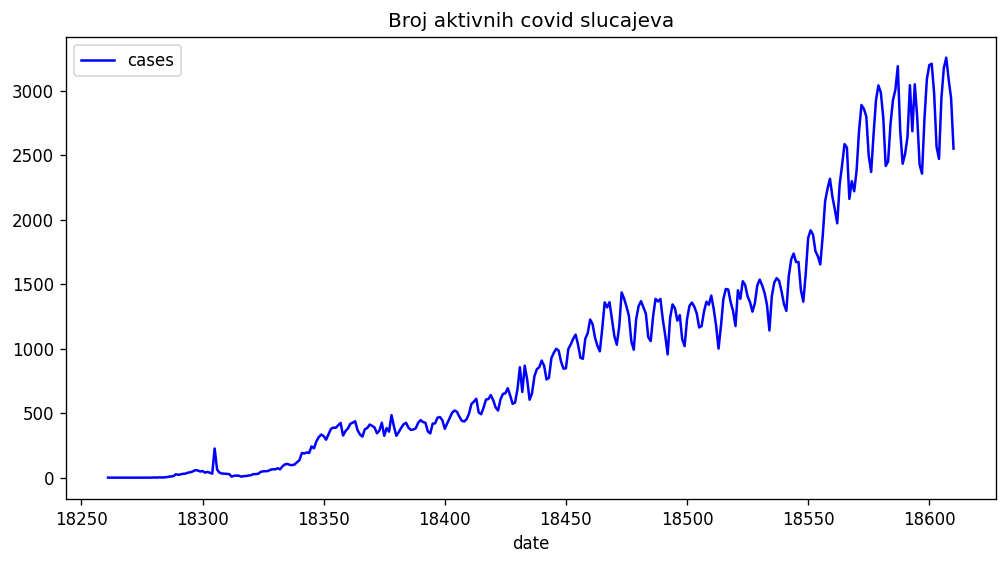

In [25]:
data.groupby('date', as_index=False).mean().plot(
    kind = 'line',
    x = 'date',
    y= 'cases',
    figsize=(10,5),
    #style = '-b', ## postavit stil kao i prije
    color = 'blue',
    linestyle = 'solid', 
    legend = True,
    title = 'Broj aktivnih covid slucajeva'
)

<Axes: title={'center': 'Broj aktivnih covid slucajeva'}, ylabel='Frequency'>

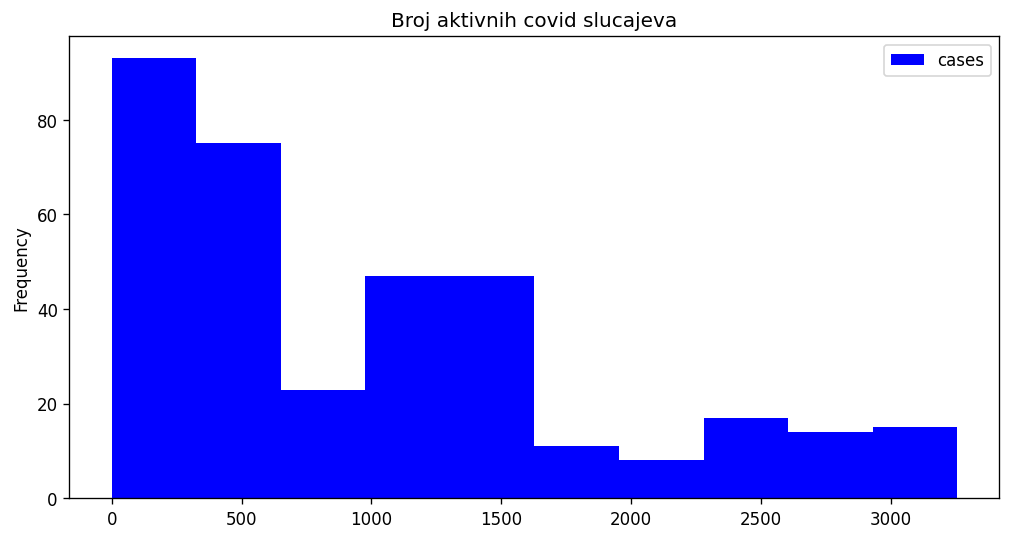

In [26]:
data.groupby('date', as_index=False).mean().plot(
    kind = 'hist',
    x = 'date',
    y= 'cases',
    figsize=(10,5),
    #style = '-b', ## postavit stil kao i prije
    color = 'blue',
    linestyle = 'solid', 
    legend = True,
    title = 'Broj aktivnih covid slucajeva'
)

<Axes: title={'center': 'Broj aktivnih covid slucajeva'}, xlabel='date'>

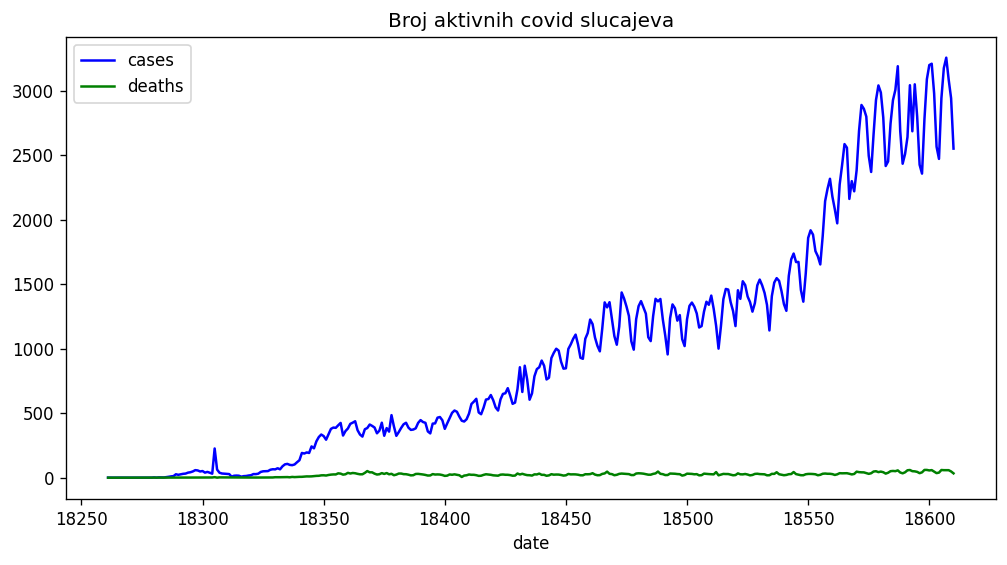

In [27]:
data.groupby('date', as_index=False).mean().plot(
    kind = 'line',
    x = 'date',
    y= ['cases', 'deaths'],
    figsize=(10,5),
    #style = '-b', ## postavit stil kao i prije
    color = ['blue', 'green'],
    linestyle = 'solid', 
    legend = True,
    title = 'Broj aktivnih covid slucajeva'
)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

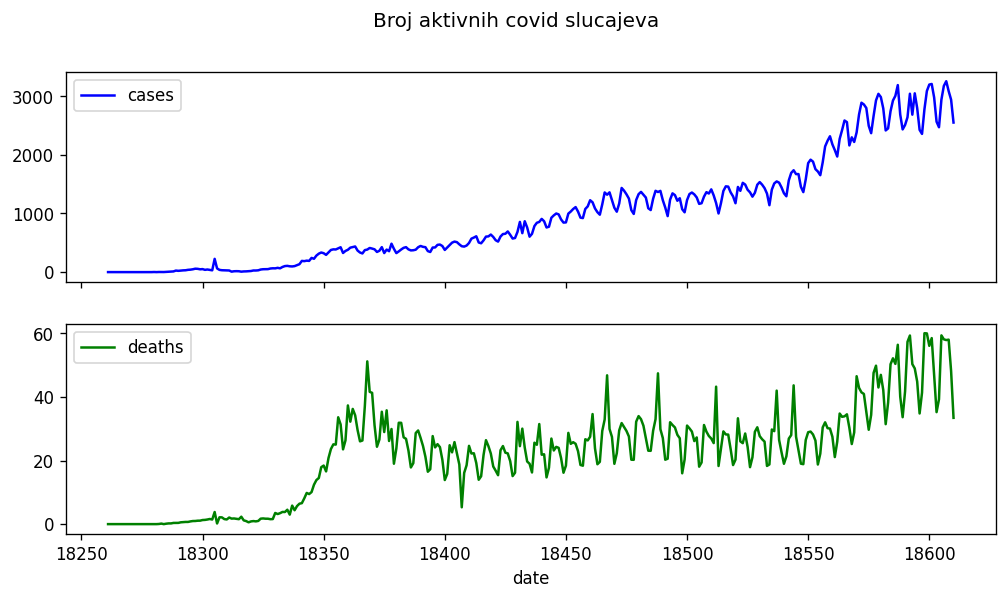

In [28]:
data.groupby('date', as_index=False).mean().plot(
    kind = 'line',
    x = 'date',
    y= ['cases', 'deaths'],
    figsize=(10,5),
    #style = '-b', ## postavit stil kao i prije
    color = ['blue', 'green'],
    linestyle = 'solid', 
    legend = True,
    title = 'Broj aktivnih covid slucajeva',
    subplots = True
)

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

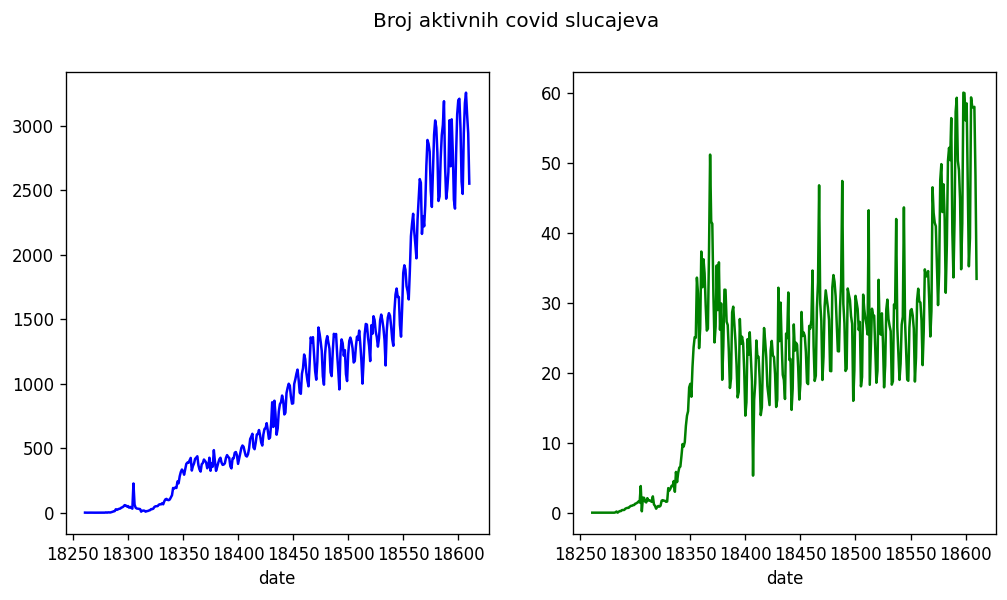

In [29]:
data.groupby('date', as_index=False).mean().plot(
    kind = 'line',
    x = 'date',
    y= ['cases', 'deaths'],
    figsize=(10,5),
    #style = '-b', ## postavit stil kao i prije
    color = ['blue', 'green'],
    linestyle = 'solid', 
    legend = False,
    title = 'Broj aktivnih covid slucajeva',
    subplots = True, 
    layout = (1,2),
)

In [30]:
prosjek = data_raw.pivot_table(
    index = data_raw.index,
    columns = 'countriesAndTerritories',
    values='cases'
).rolling(7).mean()

In [31]:
prosjek

countriesAndTerritories  Afghanistan  Albania  Algeria  Andorra  Angola  \
0                                NaN      NaN      NaN      NaN     NaN   
1                                NaN      NaN      NaN      NaN     NaN   
2                                NaN      NaN      NaN      NaN     NaN   
3                                NaN      NaN      NaN      NaN     NaN   
4                                NaN      NaN      NaN      NaN     NaN   
...                              ...      ...      ...      ...     ...   
61895                            NaN      NaN      NaN      NaN     NaN   
61896                            NaN      NaN      NaN      NaN     NaN   
61897                            NaN      NaN      NaN      NaN     NaN   
61898                            NaN      NaN      NaN      NaN     NaN   
61899                            NaN      NaN      NaN      NaN     NaN   

countriesAndTerritories  Anguilla  Antigua_and_Barbuda  Argentina  Armenia  \
0                             NaN                  NaN        NaN      NaN   
1                             NaN                  NaN        NaN      NaN   
2                             NaN                  NaN        NaN      NaN   
3                             NaN                  NaN        NaN      NaN   
4                             NaN                  NaN        NaN      NaN   
...                           ...                  ...        ...      ...   
61895                         NaN                  NaN        NaN      NaN   
61896                         NaN                  NaN        NaN      NaN   
61897                         NaN                  NaN        NaN      NaN   
61898                         NaN                  NaN        NaN      NaN   
61899                         NaN                  NaN        NaN      NaN   

countriesAndTerritories  Aruba  ...  Uruguay  Uzbekistan  Vanuatu  Venezuela  \
0                          NaN  ...      NaN         NaN      NaN        NaN   
1                          NaN  ...      NaN         NaN      NaN        NaN   
2                          NaN  ...      NaN         NaN      NaN        NaN   
3                          NaN  ...      NaN         NaN      NaN        NaN   
4                          NaN  ...      NaN         NaN      NaN        NaN   
...                        ...  ...      ...         ...      ...        ...   
61895                      NaN  ...      NaN         NaN      NaN        NaN   
61896                      NaN  ...      NaN         NaN      NaN        NaN   
61897                      NaN  ...      NaN         NaN      NaN        NaN   
61898                      NaN  ...      NaN         NaN      NaN        NaN   
61899                      NaN  ...      NaN         NaN      NaN        NaN   

countriesAndTerritories  Vietnam  Wallis_and_Futuna  Western_Sahara  Yemen  \
0                            NaN                NaN             NaN    NaN   
1                            NaN                NaN             NaN    NaN   
2                            NaN                NaN             NaN    NaN   
3                            NaN                NaN             NaN    NaN   
4                            NaN                NaN             NaN    NaN   
...                          ...                ...             ...    ...   
61895                        NaN                NaN             NaN    NaN   
61896                        NaN                NaN             NaN    NaN   
61897                        NaN                NaN             NaN    NaN   
61898                        NaN                NaN             NaN    NaN   
61899                        NaN                NaN             NaN    NaN   

countriesAndTerritories  Zambia  Zimbabwe  
0                           NaN       NaN  
1                           NaN       NaN  
2                           NaN       NaN  
3                           NaN       NaN  
4                           NaN       NaN  


<Axes: >

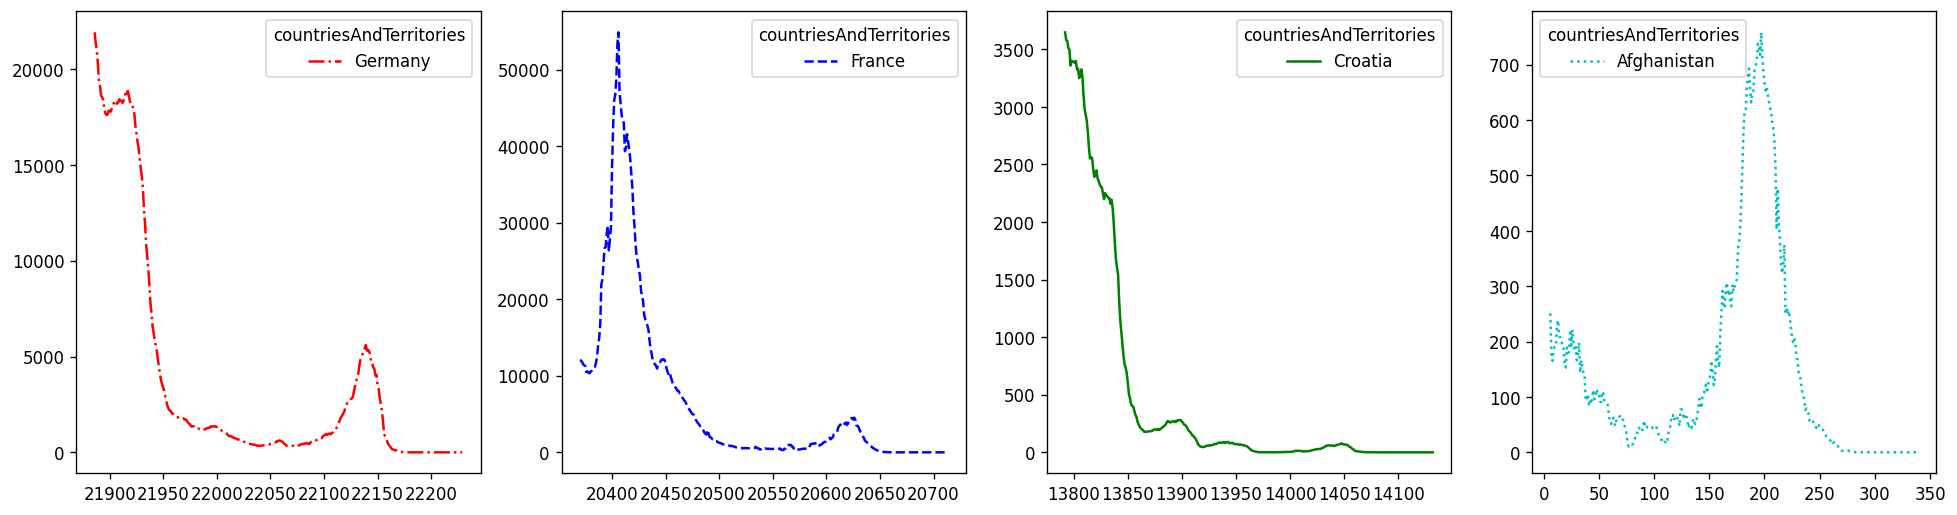

In [33]:
okvir, osi = plt.subplots(1, 4, figsize = (20, 5))
prosjek[['Germany']].plot(
    ax = osi[0],
    style='-.r'
)
prosjek[['France']].plot(
    ax = osi[1],
    style='--b'
)
prosjek[['Croatia']].plot(
    ax = osi[2],
    style='-g'
)
prosjek[['Afghanistan']].plot(
    ax = osi[3],
    style=':c'
)

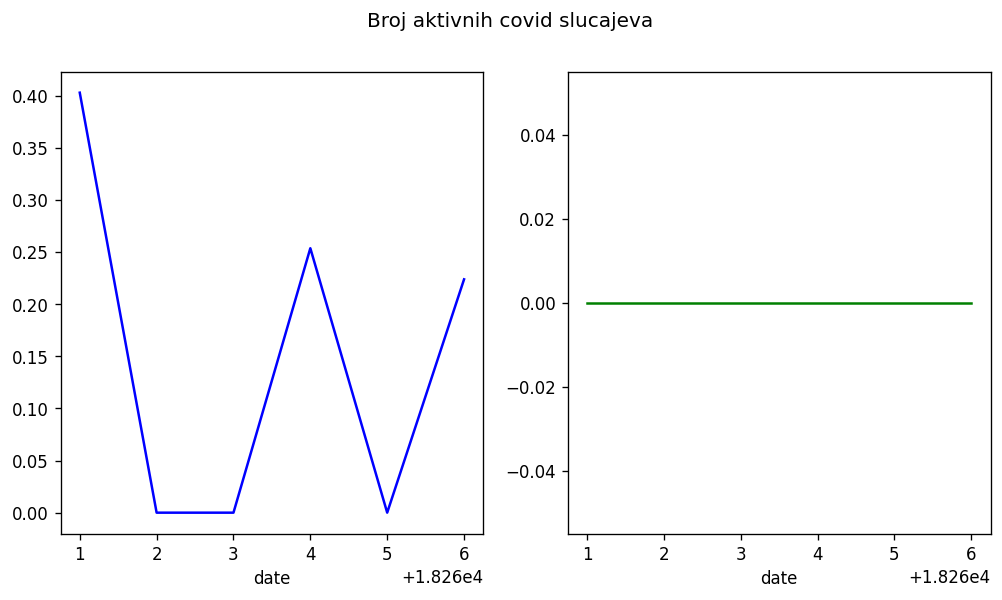

In [52]:
data.groupby('date', as_index=False).mean().loc[0:5:].plot(
    kind = 'line',
    x = 'date',
    y= ['cases', 'deaths'],
    figsize=(10,5),
    #style = '-b', ## postavit stil kao i prije
    color = ['blue', 'green'],
    linestyle = 'solid', 
    legend = False,
    title = 'Broj aktivnih covid slucajeva',
    subplots = True, 
    layout = (1,2),
)
#plt.show()